# Example from Image Processing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Using PCA to extract features

Now we'll take a look at unsupervised learning on a facial recognition example.
This uses a dataset available within scikit-learn consisting of a
subset of the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)
data.  Note that this is a relatively large download (~200MB) so it may
take a while to execute.

In [3]:
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                                       data_home='datasets')
lfw_people.data.shape

(1288, 1850)

Let's visualize these faces to see what we're working with:

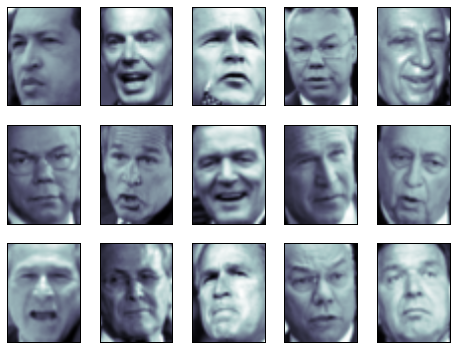

In [4]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap=plt.cm.bone)

We'll do a typical train-test split on the images before performing unsupervised learning:

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print(X_train.shape, X_test.shape)

(966, 1850) (322, 1850)


## Feature Reduction Using Principal Component Analysis

We can use PCA to reduce the original 1850 features of the face images to a manageable
size, while maintaining most of the information in the dataset.  Here it is useful to use a variant
of PCA called ``RandomizedPCA``, which is an approximation of PCA that can be much faster for large
datasets.

In [6]:
from sklearn import decomposition
pca = decomposition.RandomizedPCA(n_components=150, whiten=True)
pca.fit(X_train)

RandomizedPCA(copy=True, iterated_power=3, n_components=150,
       random_state=None, whiten=True)

One interesting part of PCA is that it computes the "mean" face, which can be
interesting to examine:

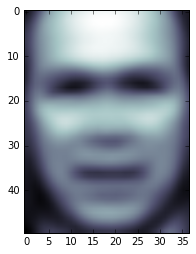

In [7]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap=plt.cm.bone)

The principal components measure deviations about this mean along orthogonal axes.
It is also interesting to visualize these principal components:

In [8]:
print(pca.components_.shape)

(150, 1850)


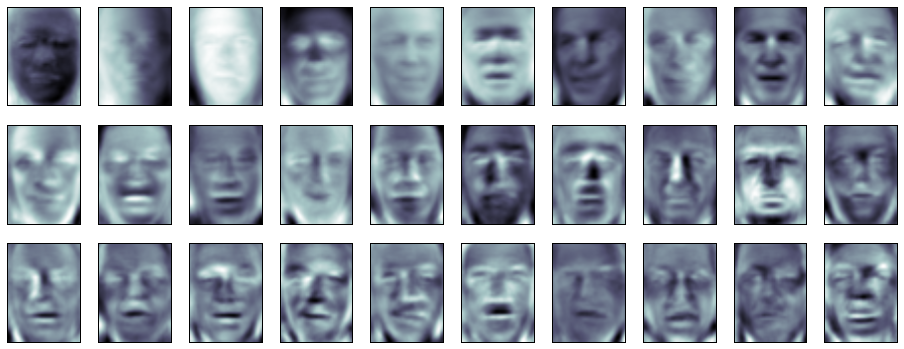

In [9]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap=plt.cm.bone)

The components ("eigenfaces") are ordered by their importance from top-left to bottom-right.
We see that the first few components seem to primarily take care of lighting
conditions; the remaining components pull out certain identifying features:
the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training
and test data onto the PCA basis:

In [10]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(966, 150)
(322, 150)


These projected components correspond to factors in a linear combination of
component images such that the combination approaches the original face.